In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [20]:
data=pd.read_csv("AppleStore.csv")


In [21]:
df= pd.DataFrame(data)
df

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,0
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,0
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,0
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,0
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,1188191109,NaN,0,NaN,0.00,0,0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,0
11096,1188375727,Escape the Sweet Shop Series,90898432,USD,0.00,3,3,5.0,5.0,1.0,4+,Games,40,0,2,1,0
11097,1188474007,NaN,0,NaN,0.00,0,0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,0
11098,1188482421,NaN,0,NaN,0.00,0,0,0.0,0.0,NaN,NaN,NaN,1,1,1,0,0


In [22]:
df=df.drop(['id','track_name','ver','currency'],axis=1)
df

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
0,100788224,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,1,0
1,158578688,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,1,0
2,100524032,0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3,1,0
3,128512000,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,1,0
4,92774400,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,0,0.00,0,0,0.0,0.0,NaN,NaN,1,1,1,0,0
11096,90898432,0.00,3,3,5.0,5.0,4+,Games,40,0,2,1,0
11097,0,0.00,0,0,0.0,0.0,NaN,NaN,1,1,1,0,0
11098,0,0.00,0,0,0.0,0.0,NaN,NaN,1,1,1,0,0


In [23]:
df.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
count,1.110000e+04,11100.000000,1.110000e+04,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.000000,11100.0
mean,1.291145e+08,1.119242,8.359482e+03,298.496486,2.286802,2.109550,24.576216,2.755225,3.875495,0.643874,0.0
std,3.044624e+08,4.768515,6.129530e+04,3164.394530,2.080899,2.129825,17.621606,2.056240,6.719282,0.478875,0.0
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0
50%,4.249093e+07,0.000000,2.000000e+01,1.000000,3.000000,2.000000,37.000000,2.000000,1.000000,1.000000,0.0
75%,1.246930e+08,0.990000,8.192500e+02,54.000000,4.500000,4.500000,38.000000,5.000000,2.000000,1.000000,0.0
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000,0.0


In [24]:
df=df.replace(np.nan,"",regex=True)
df

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
0,100788224,3.99,21292,26,4.0,4.5,4+,Games,38,5,10,1,0
1,158578688,0.00,161065,26,4.0,3.5,4+,Productivity,37,5,23,1,0
2,100524032,0.00,188583,2822,3.5,4.5,4+,Weather,37,5,3,1,0
3,128512000,0.00,262241,649,4.0,4.5,12+,Shopping,37,5,9,1,0
4,92774400,0.00,985920,5320,4.5,5.0,4+,Reference,37,5,45,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,0,0.00,0,0,0.0,0.0,,,1,1,1,0,0
11096,90898432,0.00,3,3,5.0,5.0,4+,Games,40,0,2,1,0
11097,0,0.00,0,0,0.0,0.0,,,1,1,1,0,0
11098,0,0.00,0,0,0.0,0.0,,,1,1,1,0,0


In [25]:
y= pd.DataFrame(data["prime_genre"])
y=y.replace(np.nan,"0",regex=True)
le = LabelEncoder()
y=le.fit_transform(y)

C:\Users\hp\.conda\envs\RILintern\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
for i in range(13):
    df.iloc[:,i]=le.fit_transform(df.iloc[:,i])
df

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,game_enab
0,3658,4,2535,26,7,8,3,8,15,5,10,1,0
1,5000,0,3061,26,7,6,3,16,14,5,23,1,0
2,3645,0,3089,968,6,8,3,23,14,5,3,1,0
3,4433,0,3113,553,7,8,1,18,14,5,9,1,0
4,3396,0,3178,1044,8,9,3,17,14,5,43,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,0,0,0,0,0,0,0,0,0,1,1,0,0
11096,3339,0,3,3,9,9,3,8,17,0,2,1,0
11097,0,0,0,0,0,0,0,0,0,1,1,0,0
11098,0,0,0,0,0,0,0,0,0,1,1,0,0


In [27]:
x=df.iloc[:,0:13]
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 0.57698484,  1.16194996,  2.32736204, ...,  0.94394788,
         0.7437064 ,  0.        ],
       [ 1.14508841, -0.40997503,  2.9349097 , ...,  2.93908027,
         0.7437064 ,  0.        ],
       [ 0.5714816 , -0.40997503,  2.96725064, ..., -0.13035418,
         0.7437064 ,  0.        ],
       ...,
       [-0.97154188, -0.40997503, -0.60064805, ..., -0.43729763,
        -1.34461665,  0.        ],
       [-0.97154188, -0.40997503, -0.60064805, ..., -0.43729763,
        -1.34461665,  0.        ],
       [-0.97154188, -0.40997503, -0.60064805, ..., -0.43729763,
        -1.34461665,  0.        ]])

In [28]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(x)
# Predicting the clusters
labels = kmeans.predict(x)
# Getting the cluster centers
c = kmeans.cluster_centers_


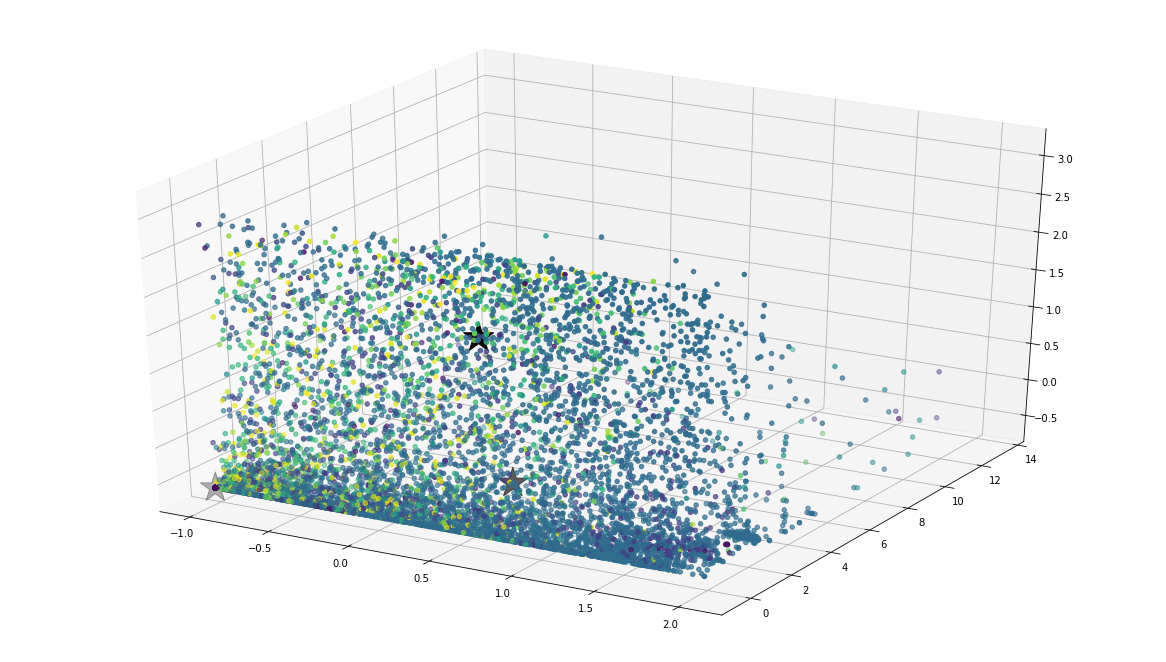

In [29]:
fig = plt.figure()
plt.rcParams["figure.figsize"]=(16,9)
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)
ax.scatter(c[:, 0], c[:, 1], c[:, 2], marker='*', c='#050505', s=1000)
plt.show()

In [30]:
x,c

(array([[ 0.57698484,  1.16194996,  2.32736204, ...,  0.94394788,
          0.7437064 ,  0.        ],
        [ 1.14508841, -0.40997503,  2.9349097 , ...,  2.93908027,
          0.7437064 ,  0.        ],
        [ 0.5714816 , -0.40997503,  2.96725064, ..., -0.13035418,
          0.7437064 ,  0.        ],
        ...,
        [-0.97154188, -0.40997503, -0.60064805, ..., -0.43729763,
         -1.34461665,  0.        ],
        [-0.97154188, -0.40997503, -0.60064805, ..., -0.43729763,
         -1.34461665,  0.        ],
        [-0.97154188, -0.40997503, -0.60064805, ..., -0.43729763,
         -1.34461665,  0.        ]]),
 array([[ 0.04875495, -0.08388027, -0.3996074 , -0.36743895, -0.1993001 ,
         -0.44929405,  0.54993113,  0.76324776,  0.72316832, -0.35216724,
         -0.17499918,  0.71810696,  0.        ],
        [-0.97154188, -0.40997503, -0.60064805, -0.42981773, -1.08775509,
         -0.97765129, -1.18985866, -1.03140537, -1.32112343, -0.85364748,
         -0.43729763, -1.344